现有二手房信息，要求读取数据，对数据进行清晰，并计算所有区域的二手房均价，并绘图展示。

In [2]:
import pandas as pd  # 导入pandas模块
pd.set_option('display.unicode.east_asian_width', True) # 解决数据输出时列名不对齐的问题
# 导入csv数据文件
house = pd.read_csv('house.csv')
house.head(5) # 输出前5条数据

,序号,小区名字,总价,户型,建筑面积,单价,朝向,楼层,装修,区域
0,0,中天北湾新城,89万,2室2厅1卫,89平米,10000元/平米,南北,低层,毛坯,高新
1,1,桦林苑,99.8万,3室2厅1卫,143平米,6979元/平米,南北,中层,毛坯,净月
2,2,嘉柏湾,32万,1室1厅1卫,43.3平米,7390元/平米,南,高层,精装修,经开
3,3,中环12区,51.5万,2室1厅1卫,57平米,9035元/平米,南北,高层,精装修,南关
4,4,昊源高格蓝湾,210万,3室2厅2卫,160.8平米,13060元/平米,南北,高层,精装修,二道


In [3]:
house.drop(columns='序号', inplace=True)  # 将索引列删除
house.dropna(axis=0, how='any', inplace=True)  # 删除house数据中的所有空值
house['单价'] = house['单价'].map(lambda d: d.replace('元/平米', ''))  # 将单价“元/平米”去掉
house['单价'] = house['单价'].astype(float)  # 将房子单价转换为浮点类型
house['总价'] = house['总价'].map(lambda z: z.replace('万', ''))  # 将总价“万”去掉
house['总价'] = house['总价'].astype(float)  # 将房子总价转换为浮点类型
house['建筑面积'] = house['建筑面积'].map(lambda p: p.replace('平米', ''))  # 将建筑面价“平米”去掉
house['建筑面积'] = house['建筑面积'].astype(float)  # 将建筑面积转换为浮点类型
print(house.head())  # 输出前5条数据
house.to_csv('./house_completed.csv')  #数据导出为csv文件

       小区名字   总价       户型  建筑面积     单价  朝向  楼层    装修  区域
0  中天北湾新城   89.0  2室2厅1卫      89.0  10000.0  南北  低层    毛坯  高新
1        桦林苑   99.8  3室2厅1卫     143.0   6979.0  南北  中层    毛坯  净月
2        嘉柏湾   32.0  1室1厅1卫      43.3   7390.0    南  高层  精装修  经开
3      中环12区   51.5  2室1厅1卫      57.0   9035.0  南北  高层  精装修  南关
4  昊源高格蓝湾  210.0  3室2厅2卫     160.8  13060.0  南北  高层  精装修  二道


In [4]:
import pandas as pd  # 导入pandas模块
import matplotlib.pyplot as plt  # 导入matplotlib中的pyplot模块

# 解决数据输出时列名不对齐的问题
pd.set_option('display.unicode.east_asian_width', True)

# 获取各区二手房均价分析
def get_average_price():
    group = house.groupby('区域')  # 将房子区域分组
    average_price_group = group['单价'].mean()  # 计算每个区域的均价
    print(average_price_group)  # 输出各区二手房的均价信息
    region = average_price_group.index  # 区域
    average_price = average_price_group.values.astype(int)  # 区域对应的均价，转换成int类型
    return region, average_price  # 返回区域与对应的均价


# 调用函数
get_average_price()


区域
二道     9642.367347
净月    12426.877133
南关    10602.396887
宽城     8062.537594
朝阳    14328.618834
汽开     9176.100000
经开     9369.863333
绿园     9654.157895
高新    11009.233161
Name: 单价, dtype: float64


(Index(['二道', '净月', '南关', '宽城', '朝阳', '汽开', '经开', '绿园', '高新'], dtype='object', name='区域'),
 array([ 9642, 12426, 10602,  8062, 14328,  9176,  9369,  9654, 11009]))

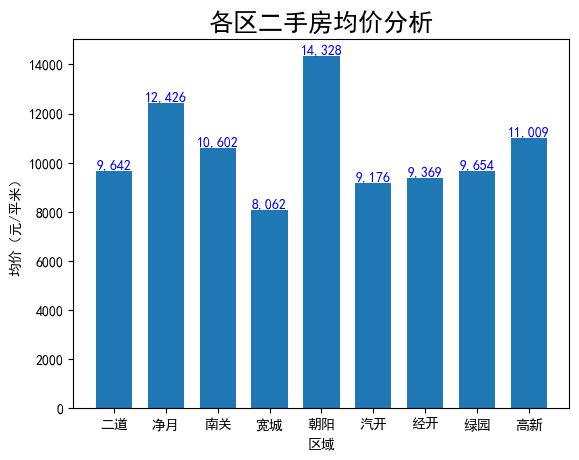

In [5]:
import pandas as pd  # 导入pandas模块
import matplotlib.pyplot as plt  # 导入matplotlib中的pyplot模块

# 解决数据输出时列名不对齐的问题
pd.set_option('display.unicode.east_asian_width', True)
# 手动添加黑体字体，解决中文乱码问题
plt.rcParams['font.sans-serif'] = ['SimHei']
# 导入csv数据文件
# house = pd.read_csv('/home/qingjiao/Document/data/17_2/house_completed.csv')


# 获取各区二手房均价分析
def get_average_price():
    group = house.groupby('区域')  # 将房子区域分组
    average_price_group = group['单价'].mean()  # 计算每个区域的均价
    #    print(average_price_group)  # 输出各区二手房的均价信息
    region = average_price_group.index  # 区域
    average_price = average_price_group.values.astype(int)  # 区域对应的均价，转换成int类型
    return region, average_price  # 返回区域与对应的均价


# 绘制并显示各区二手房均价分析图
def show_average_price():
    region, average_price = get_average_price()  # 获取房子区域与均价
    # 绘制柱形图，柱子宽度0.7，居中
    plt.bar(region, average_price, width=0.7, align='center')
    plt.title('各区二手房均价分析', fontsize=18)  # 设置图表标题，大小为18
    plt.xlabel('区域')  # x轴标题
    plt.ylabel('均价（元/平米）')  # y轴标题
    # 设置每个柱子的文本标签，format(b,',')表示格式化均价为千位分隔符格式
    for a, b in zip(region, average_price):
        plt.text(a, b, format(b, ','), ha='center', va='bottom', fontsize=10, color='b')
    plt.show()  # 显示图表


# 调用函数
show_average_price()